### Dimensionality Reduction Techniques
Similar to feature selection, the topic of dimensionality reduction involves techniques of extracting the discriminitory power from complex hyper-dimensional spaces by learning their hidden internal structures. It's not uncommon for very large data-sets to contain hundreds, or even thousands, of features. What's more, often times many of those features may have archane meanings and/or exhibit very little correlation to an dependent (response) feature; instead exhibiting stronger correlation to one or more of the other independent (predictor) features. These scenarios make feature selection challenging if not even impossible since examining each feature individually would be impractical. This notebook will explore and demonstrate the following  techniques:

- Principal Component Analysis (PCA)
- Linear Discriminant Analysis (LDA)

### Import Required Libraries

In [1]:
import os
import numpy as np
import pandas as pd
    
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve, auc, roc_auc_score

import matplotlib.pyplot as plt
%matplotlib inline

### Load the Data

In [2]:
# Read the cleaned source file into a DataFrame.
data_dir = os.path.join(os.getcwd(), 'Data')
source_file = os.path.join(data_dir, 'WA-Telco-Customer-Churn-ML.xlsx')
df = pd.read_excel(source_file, header=0)

# Drop the Unique Identifier
df = df.drop(labels=['customerID'], axis=1)

# Display the Dimensions of the DataSet Being Used.
print("DataSet Dimensions:", df.shape)

DataSet Dimensions: (7043, 20)


#### Make Appropriate Data Type Assignments

In [3]:
df.gender = pd.to_numeric(df.gender, downcast='integer', errors='coerce')
df.SeniorCitizen = pd.to_numeric(df.SeniorCitizen, downcast='integer', errors='coerce')
df.Partner = pd.to_numeric(df.Partner, downcast='integer', errors='coerce')
df.Dependents = pd.to_numeric(df.Dependents, downcast='integer', errors='coerce')
df.tenure = pd.to_numeric(df.tenure, downcast='integer', errors='coerce')
df.PhoneService = pd.to_numeric(df.PhoneService, downcast='integer', errors='coerce')
df.MultipleLines = pd.to_numeric(df.MultipleLines, downcast='integer', errors='coerce')
df.InternetService = pd.to_numeric(df.InternetService, downcast='integer', errors='coerce')
df.OnlineSecurity = pd.to_numeric(df.OnlineSecurity, downcast='integer', errors='coerce')
df.OnlineBackup = pd.to_numeric(df.OnlineBackup, downcast='integer', errors='coerce')
df.DeviceProtection = pd.to_numeric(df.DeviceProtection, downcast='integer', errors='coerce')
df.TechSupport = pd.to_numeric(df.TechSupport, downcast='integer', errors='coerce')
df.StreamingTV = pd.to_numeric(df.StreamingTV, downcast='integer', errors='coerce')
df.StreamingMovies = pd.to_numeric(df.StreamingMovies, downcast='integer', errors='coerce')
df.Contract = pd.to_numeric(df.Contract, downcast='integer', errors='coerce')
df.PaperlessBilling = pd.to_numeric(df.PaperlessBilling, downcast='integer', errors='coerce')
df.PaymentMethod = pd.to_numeric(df.PaymentMethod, downcast='integer', errors='coerce')
df.MonthlyCharges = pd.to_numeric(df.MonthlyCharges, downcast='float', errors='coerce')
df.TotalCharges = pd.to_numeric(df.TotalCharges, downcast='float', errors='coerce')
df.Churn = pd.to_numeric(df.Churn, downcast='integer', errors='coerce')

# Validate new data type assignments.
df.dtypes

gender                 int8
SeniorCitizen          int8
Partner                int8
Dependents             int8
tenure                 int8
PhoneService           int8
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling       int8
PaymentMethod          int8
MonthlyCharges      float32
TotalCharges        float32
Churn                  int8
dtype: object

#### Separate the Independant (Predictor) Variables (X) from the Dependant (Target, Response, or Label) Variable (y)

In [4]:
X = df.drop(labels=['Churn'], axis=1)
y = df.Churn

#### Create Separate Datasets for Training and Testing

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Use 75% of the observations for training...
print('-------------------------------------------------------------------')
print("Training Observations:", X_train.shape)

# ...And use the rest for testing.
print("Testing Observations:", X_test.shape)
print('-------------------------------------------------------------------\n')

# Examine the distribution of Labels for the two datasets.
print("Training Label Distribution:\n", y_train.value_counts())
print('-------------------------------------------------------------------')
print("Testing Label Distribution:\n", y_test.value_counts())
print('-------------------------------------------------------------------')

-------------------------------------------------------------------
Training Observations: (5282, 19)
Testing Observations: (1761, 19)
-------------------------------------------------------------------

Training Label Distribution:
 0    3880
1    1402
Name: Churn, dtype: int64
-------------------------------------------------------------------
Testing Label Distribution:
 0    1294
1     467
Name: Churn, dtype: int64
-------------------------------------------------------------------


#### Perform Scalar Normalization of the Datasets

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Technique 1: Principal Component Analysis (PCA)
Principal Component Analysis (PCA) is an unsupervised learning algorithm that's frequently used to address problems including hyperparametric data and the presence of non-linear feature correlations. Implementing a technique called matrix decomposition, PCA creates uncorrelated linear combinations using the original features, and then projects the sum of their discriminatory power onto a much smaller dimensional space. In other words, the predictive power of a large number of features is "distilled" into a smaller number of more powerful "components". The resulting components are fully independent and uncorrelated (i.e., they exhibit no relation to one another) and are ranked according to their "explained variance" (i.e., the amount of variance they represent from the original features). One drawback of implementing PCA is that it isn't easily interpretable since it obscures the identity of the features as they contribute to the predictive power of the dataset. Therefore, its use is appropriate when it is unnecessary to understand the origin of the prediction.

In [7]:
# Define the Number of Components to Target
n_components = X_train.shape[1]

# Get the range of components
components = list(range(1, n_components+1))

pca = PCA(n_components=n_components)

# Reduce the data, outputting an ndarray
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Get the explained variance associated with each component.
explained_variance = pca.explained_variance_ratio_

# Print out the explained variance associated with each component.
print(explained_variance)
print('-------------------------------------------------------------------')
print("Total Variance Explained: %0.4f" % sum(explained_variance))
print('-------------------------------------------------------------------')

[0.22447058 0.12078828 0.07859267 0.06396265 0.05747223 0.05301468
 0.04887171 0.0453574  0.04314648 0.04086019 0.03749888 0.03653018
 0.03561703 0.03009237 0.02906223 0.02486371 0.01689005 0.01013232
 0.00277638]
-------------------------------------------------------------------
Total Variance Explained: 1.0000
-------------------------------------------------------------------


##### Use a Skree Plot to Illustrate the Explained Variance of Each Component

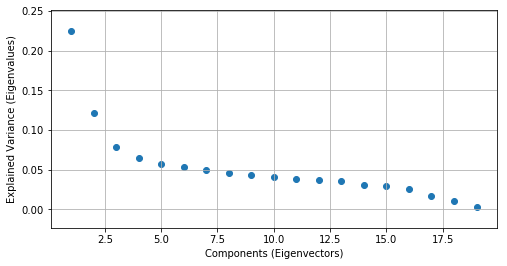

In [8]:
fig = plt.figure(figsize=(8,4))
plt.scatter(components, explained_variance)
plt.ylabel('Explained Variance (Eigenvalues)')
plt.xlabel('Components (Eigenvectors)')
plt.grid(True)
plt.show()

### Technique 2: Linear Discriminant Analysis (LDA)
Unlike Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA) is a supervised learning algorithm; therefore, it can only be used when a label (dependent variable) is included in the source data. However, like PCA, Linear Discriminant Analysis (LDA) also creates linear combinations of the original features for the sake of projecting the sum of their discriminatory power onto a much smaller dimensional space. LDA also differs from PCA in that it doesn't maximize the explained variance contained within each resulting component. Rather, since LDA is a classification algorithm it works by maximizing the separability between the classes that are defined by the dependent (label, target or response) variable.  Whereas PCA redistributes the variability of a feature-set to a smaller set of ranked components, LDA learns the decision boundaries from the dependent variable, and then redistributes the features that account for most variablity between classes to their most discriminitory directions. Ultimately the number of components produced should reflect the number of classifications represented by the label  

In [9]:
# Define the Number of Components to Target
n_components = len(y_train.unique())-1

lda = LinearDiscriminantAnalysis(n_components=n_components)

# Reduce the data
X_train = lda.fit(X_train, y_train).transform(X_train)  
#X_test = lda.transform(X_test)

# Get Predictions and probabilities
y_pred = lda.predict(X_test)
y_probs = lda.predict_proba(X_test)

#### Illustrate the Separability of Each Component

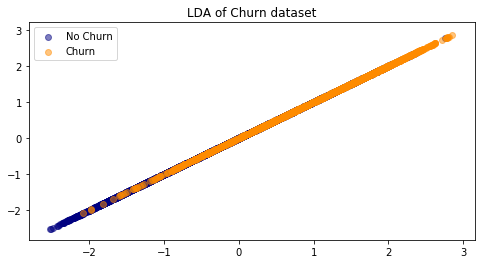

In [10]:
target_names = ['No Churn', 'Churn']
colors = ['navy', 'darkorange']
lw = 2

plt.figure(figsize=(8,4))

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, -1], alpha=.5, color=color, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Churn dataset')
plt.show()

In [11]:
# Create a Confusion Matrix
pd.crosstab(y_test, y_pred, rownames=['Actuals'], colnames=['Predictions'])

Predictions,0,1
Actuals,,
0,1140,154
1,215,252


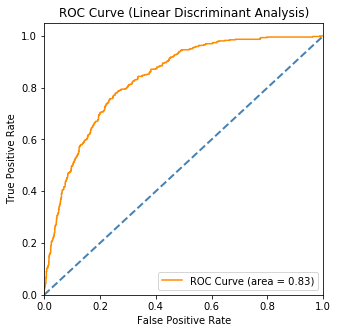

In [12]:
plt.figure(figsize=(5,5))
plt.title('ROC Curve (Linear Discriminant Analysis)')

fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
auc = roc_auc_score(y_test, y_probs[:, 1])

plt.plot(fpr, tpr, color='darkorange', label='ROC Curve (area = %0.2f)' % auc)
plt.plot([0,1], [0,1], color='steelblue', lw=2, linestyle='--')   
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()